In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import nutpie

print(f"Running on PyMC v{pm.__version__}")

# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

Running on PyMC v5.20.0


In [2]:
# set the genuine model constants
sigma_true = 1
alpha_true = [1, 1.5, 2.5]

# number of fake data points
N = 200
X1 = np.random.randn(N)
X2 = np.random.randn(N) * 0.2

# simulate epsilon as N(0, sigma_true**2)
epsilon = rng.normal(size=N) * sigma_true
Y = alpha_true[0] + alpha_true[1] * X1 + alpha_true[2] * X2 + epsilon

basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10, shape=3)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha[0] + alpha[1] * X1 + alpha[2] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)


In [3]:
compiled_model = nutpie.compile_pymc_model(basic_model)

/home/jake/miniforge3/envs/pymc_env/lib/python3.12/site-packages/pymc/pytensorf.py:1066: FutureWarning: compile_pymc was renamed to compile. Old name will be removed in a future release of PyMC
  warnings.warn(
/home/jake/miniforge3/envs/pymc_env/lib/python3.12/site-packages/pymc/pytensorf.py:1066: FutureWarning: compile_pymc was renamed to compile. Old name will be removed in a future release of PyMC
  warnings.warn(


In [10]:
trace_pymc = nutpie.sample(compiled_model,draws=2000, chains=4)

Progress,Draws,Divergences,Step Size,Gradients/Draw
,2300,0,0.98,3
,2300,0,1.00,3
,2300,0,0.97,3
,2300,0,0.99,3


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],1.16,0.07,1.02,1.30,0.0,0.0,53664.43,27106.47,1.0
alpha[1],1.54,0.07,1.40,1.67,0.0,0.0,48668.63,28726.99,1.0
alpha[2],3.14,0.37,2.45,3.83,0.0,0.0,45770.02,29017.13,1.0
sigma_log__,0.04,0.05,-0.06,0.13,0.0,0.0,53374.56,28798.92,1.0
sigma,1.04,0.05,0.94,1.14,0.0,0.0,53374.56,28798.92,1.0


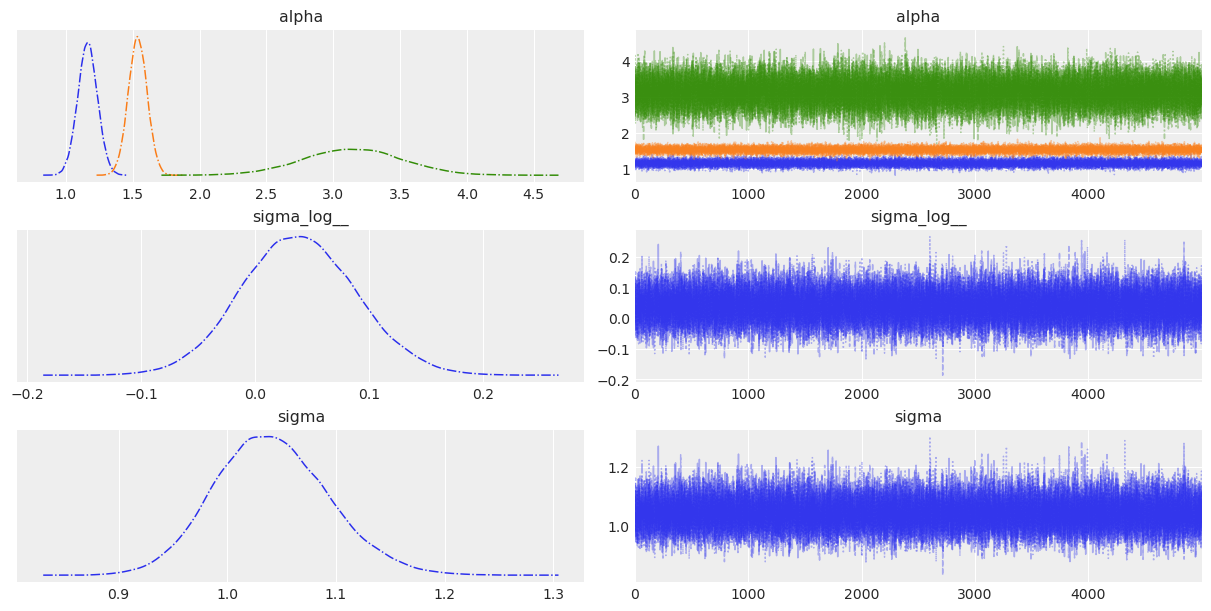

In [9]:
az.plot_trace(trace_pymc, combined=True)
az.summary(trace_pymc, round_to=2)


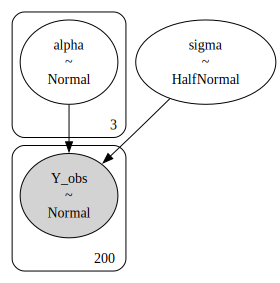

In [11]:
pm.model_to_graphviz(basic_model)